In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv("kdrama_DATASET.csv")
df.head()

,Rank,Title,Year of release,Number of Episodes,Rating,Description,Genre,Tags,Actors
0,#1,Move to Heaven,2021,10,9.2,Geu Roo is a young autistic man. He works for ...,"Life, Drama, Family","Autism, Uncle-Nephew Relationship, Death, Sava...","Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju..."
1,#2,Twinkling Watermelon,2023,16,9.2,"In 2023, high school student Eun Gyeol, a CODA...","Romance, Youth, Drama, Fantasy","Time Travel, Child From The Future, Sign Langu...","Ha Eun-Gyeol, Ha Yi-Chan, Choi Se-Kyung, Yoon ..."
2,#3,Moving,2023,20,9.1,"Kim Bong Seok, Jang Hui Su, and Lee Gang Hun, ...","Action, Thriller, Mystery, Supernatural","Graphic Violence, Supernatural Power, Multiple...","Ryu Seung Ryong, Han Hyo Joo, Zo In Sung"
3,#4,The Trauma Code: Heroes on Call,2025,8,9.1,"Baek Gang Hyeok, a genius trauma surgeon with ...","Action, Comedy, Drama, Medical","Surgeon Male Lead, Hospital Setting, Mentor-Me...","Ju Ji Hoon, Choo Young Woo, Ha Young, Yoon Gyu..."
4,#5,Flower of Evil,2020,16,9.1,Although Baek Hee Sung is hiding a dark secret...,"Thriller, Romance, Crime, Melodrama","Married Couple, Deception, Suspense, Family Se...","Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo ..."


In [23]:
df.columns = df.columns.str.strip()
df.columns

Index(['Rank', 'Title', 'Year of release', 'Number of Episodes', 'Rating',
       'Description', 'Genre', 'Tags', 'Actors'],
      dtype='object')

In [24]:
df.isnull().sum()

Rank                  0
Title                 0
Year of release       0
Number of Episodes    0
Rating                0
Description           0
Genre                 0
Tags                  0
Actors                0
dtype: int64

In [25]:
df.describe()

,Year of release,Number of Episodes,Rating
count,350.000000,350.000000,350.000000
mean,2019.808571,18.254286,8.364857
std,3.713282,14.565962,0.454704
min,2003.000000,1.000000,6.400000
25%,2018.000000,12.000000,8.300000
50%,2020.000000,16.000000,8.400000
75%,2023.000000,16.000000,8.600000
max,2025.000000,133.000000,9.200000


# EDA

In [26]:
df_clean = df.dropna(subset=['Rating', 'Number of Episodes', 'Year of release'])
df_clean

,Rank,Title,Year of release,Number of Episodes,Rating,Description,Genre,Tags,Actors
0,#1,Move to Heaven,2021,10,9.2,Geu Roo is a young autistic man. He works for ...,"Life, Drama, Family","Autism, Uncle-Nephew Relationship, Death, Sava...","Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju..."
1,#2,Twinkling Watermelon,2023,16,9.2,"In 2023, high school student Eun Gyeol, a CODA...","Romance, Youth, Drama, Fantasy","Time Travel, Child From The Future, Sign Langu...","Ha Eun-Gyeol, Ha Yi-Chan, Choi Se-Kyung, Yoon ..."
2,#3,Moving,2023,20,9.1,"Kim Bong Seok, Jang Hui Su, and Lee Gang Hun, ...","Action, Thriller, Mystery, Supernatural","Graphic Violence, Supernatural Power, Multiple...","Ryu Seung Ryong, Han Hyo Joo, Zo In Sung"
3,#4,The Trauma Code: Heroes on Call,2025,8,9.1,"Baek Gang Hyeok, a genius trauma surgeon with ...","Action, Comedy, Drama, Medical","Surgeon Male Lead, Hospital Setting, Mentor-Me...","Ju Ji Hoon, Choo Young Woo, Ha Young, Yoon Gyu..."
4,#5,Flower of Evil,2020,16,9.1,Although Baek Hee Sung is hiding a dark secret...,"Thriller, Romance, Crime, Melodrama","Married Couple, Deception, Suspense, Family Se...","Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo ..."
...,...,...,...,...,...,...,...,...,...
345,#346,Oh! Youngsim,2023,10,6.9,"Oh Young Sim, a 30-something TV variety show P...","Comedy, Romance","Childhood Acquaintances Reuniting, Producer Fe...","Song Ha Yoon, Lee Dong Hae, Lee Min Jae, Ryu H..."
346,#347,DNA Lover,2024,16,6.9,"So Jin, a genetic researcher who loves DNA, de...","Comedy, Romance, Melodrama","Medical Research, Medical, Columnist Female Le...","Choi Si Won, Jung In Sun, Jung Eugene, Lee Tae..."
347,#348,Our Love Triangle,2024,10,6.9,"Hae Rin, a university student, finds herself t...","Romance, Youth","Tsundere Male Lead, Ex Comes Back, Passionate ...","Gong Chan, Ahn Se Min, Kim Si Gyeong"
348,#349,The Brave Yong Su Jeong,2024,124,6.8,"Yong Su Jeong has a refreshing charm, which he...","Romance, Drama, Melodrama","Guest House Setting, Adoptive Father-Adoptive ...","Uhm Hyun Kyung, Seo Joon Young, Im Ju Eun, Kwo..."


# Visualisation

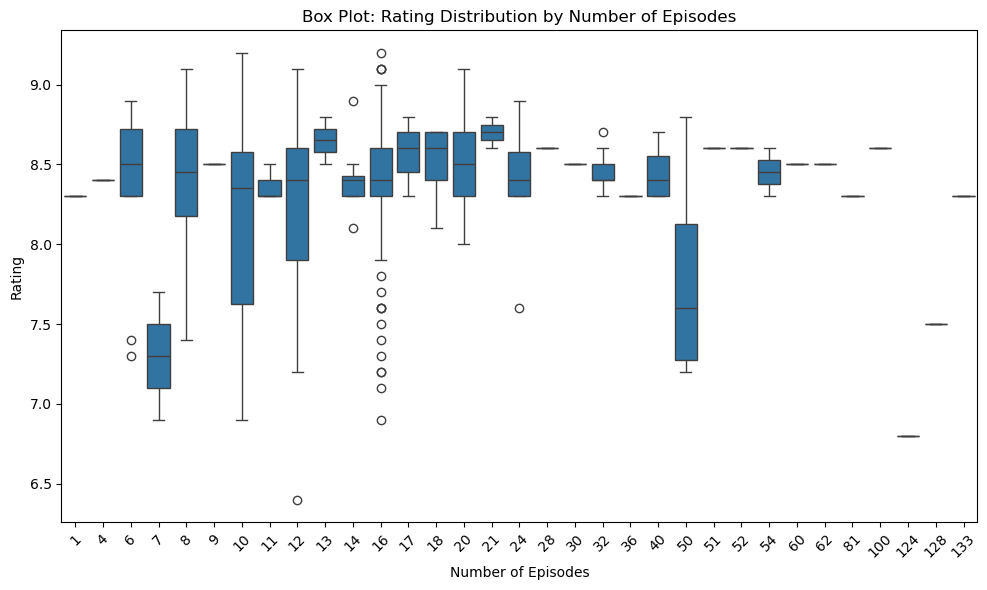

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Number of Episodes', y='Rating', data=df_clean)
plt.title("Box Plot: Rating Distribution by Number of Episodes")
plt.xlabel("Number of Episodes")
plt.ylabel("Rating")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

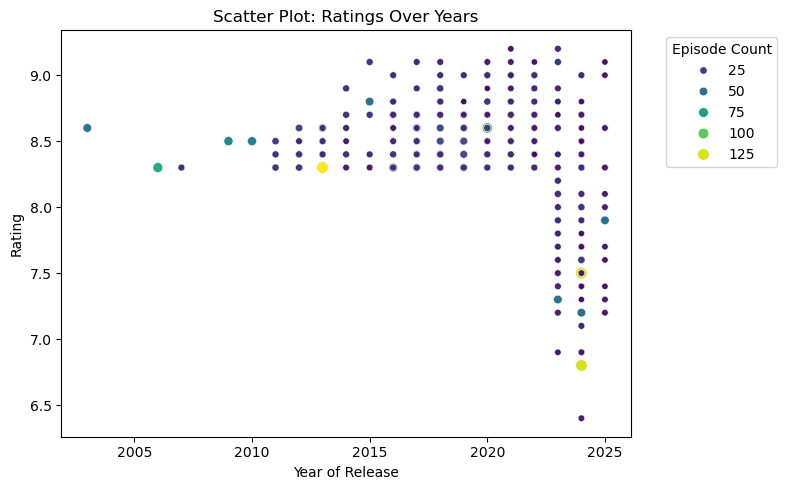

In [28]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_clean, x='Year of release', y='Rating',
                hue='Number of Episodes', size='Number of Episodes',
                palette='viridis', legend='brief')
plt.title("Scatter Plot: Ratings Over Years")
plt.xlabel("Year of Release")
plt.ylabel("Rating")
plt.legend(title='Episode Count', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

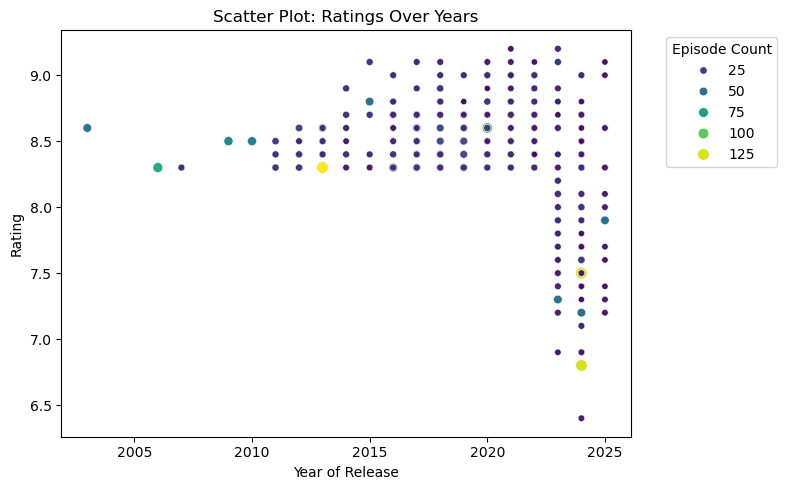

In [29]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_clean, x='Year of release', y='Rating',
                hue='Number of Episodes', size='Number of Episodes',
                palette='viridis', legend='brief')
plt.title("Scatter Plot: Ratings Over Years")
plt.xlabel("Year of Release")
plt.ylabel("Rating")
plt.legend(title='Episode Count', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

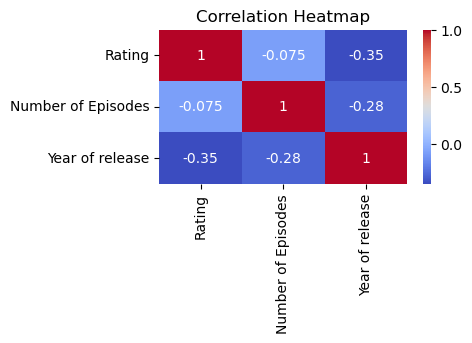

In [30]:
plt.figure(figsize=(4, 2))
sns.heatmap(df_clean[['Rating', 'Number of Episodes', 'Year of release']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Feature Engineering

In [31]:
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Number of Episodes'] = pd.to_numeric(df['Number of Episodes'], errors='coerce')
df['Year of release'] = pd.to_numeric(df['Year of release'], errors='coerce')

In [32]:
df_clean['High Rating'] = (df_clean['Rating'] >= 9.0).astype(int)

# Desicion Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
df_clean['High Rating'] = (df_clean['Rating'] >= 9.0).astype(int)
X_tree = df_clean[['Year of release', 'Number of Episodes']]
y_tree = df_clean['High Rating']

In [40]:
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X_tree, y_tree, test_size=0.2, random_state=42)

In [41]:
tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_model.fit(X_train_tree, y_train_tree)
y_pred_tree = tree_model.predict(X_test_tree)

In [42]:
tree_model

DecisionTreeClassifier(max_depth=4, random_state=42)

In [43]:
# Accuracy
tree_accuracy = accuracy_score(y_test_tree, y_pred_tree)
print(f"Decision Tree Accuracy: {tree_accuracy:.2f}")

Decision Tree Accuracy: 0.96


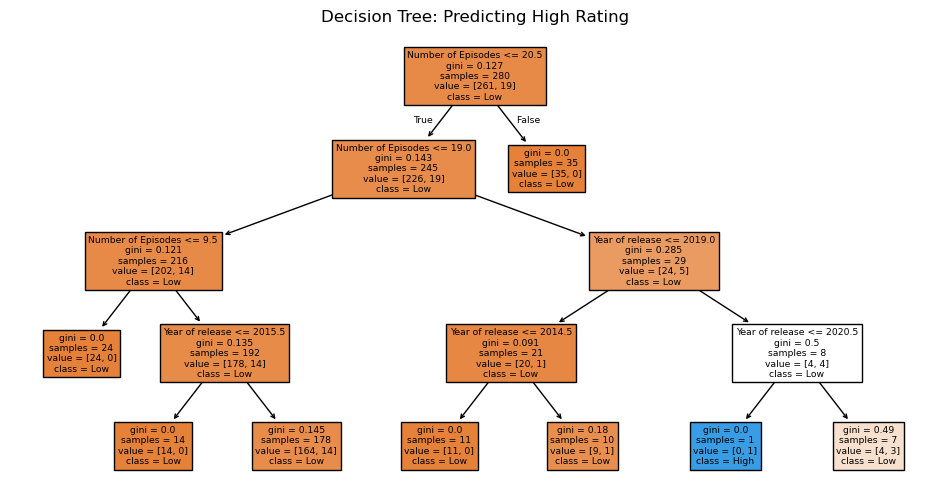

In [44]:
plt.figure(figsize=(12, 6))
plot_tree(tree_model, feature_names=X_tree.columns, class_names=['Low', 'High'], filled=True)
plt.title("Decision Tree: Predicting High Rating")
plt.show()

# Gradient Boosting Classifier

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

In [54]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [57]:
X = df_clean[['Year of release', 'Number of Episodes']]
y = df_clean['Rating'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

In [59]:
gb_model

GradientBoostingClassifier(random_state=42)

In [60]:
y_test = y_test.astype(int)
y_pred_gb = y_pred_gb.astype(int)

In [61]:
y_pred_gb

array([8, 7, 7, 8, 8, 8, 8, 8, 7, 8, 8, 8, 8, 8, 8, 8, 7, 8, 8, 8, 8, 7,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 8, 8, 8, 8, 7, 8, 8, 8, 8,
       8, 8, 7, 8, 8, 6, 7, 7, 8, 8, 8, 8, 8, 7, 8, 8, 8, 8, 9, 7, 8, 8,
       8, 8, 8, 8])

In [62]:
print("Gradient Boosting Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))

Gradient Boosting Classifier
Accuracy: 0.8
